In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
os.getcwd()

'C:\\Users\\Thinkpad-E470\\Downloads\\titanic\\Capstone'

In [3]:
fname=[]
count=0
for root, dirs, files in os.walk("C:\\Users\\Thinkpad-E470\\Downloads\\titanic\\Capstone"):
    for file in files:
        if file.endswith(".mat"):
             print(os.path.join(root, file))
             fname.append(os.path.join(root, file))
             count=count+1

C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-010_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-011_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-012_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-013_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-015_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-016_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-017_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-020_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-023_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-024_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-027_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-034_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\001__001-035_0.mat
C:\Users\Thinkpad-E470\Downloads\titanic\Capstone\002__002-001_0.mat
C:\Users\Thinkpad-E470\Downloads\t

In [4]:
#Getting X,Y,Z value of faces
x=np.empty([53215,23])
y=np.empty([53215,23])
z=np.empty([53215,23])
import time
start_time = time.time()
for i in range(0,count):
    data = scipy.io.loadmat(fname[i])
    X = data['shape'][0]
    Y = data['shape'][1]
    Z = data['shape'][2]
    x[:,i]=X
    y[:,i]=Y
    z[:,i]=Z
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6931354999542236 seconds ---


In [7]:
np.max(x)

102121.22614214719

In [8]:
np.min(x)

-101987.84466077844

In [9]:
np.max(y)

87233.93508910586

In [10]:
np.min(y)

-143750.85184233132

In [6]:
x.shape

(53215, 23)

In [6]:
os.chdir("C:\\Users\\Thinkpad-E470\\Downloads\\titanic\\Cap")

In [7]:
os.getcwd()

'C:\\Users\\Thinkpad-E470\\Downloads\\titanic\\Cap'

In [8]:
#Getting Test face
data = scipy.io.loadmat("014__014-016_0")
Xnew = data['shape'][0]
Ynew = data['shape'][1]
Znew = data['shape'][2]

In [10]:
#multiple coefficient for face
import statsmodels.api as sm
xgrad=np.empty([53215,count])
ygrad=np.empty([53215,count])
zgrad=np.empty([53215,count])
import time
start_time = time.time()
for i in range(0,53215):
    model = sm.OLS(Xnew[i:i+1], x[i:i+1])
    results = model.fit()
    xgrad[i]=results.params
    model = sm.OLS(Ynew[i:i+1], y[i:i+1])
    results = model.fit()
    ygrad[i]=results.params
    model = sm.OLS(Znew[i:i+1], z[i:i+1])
    results = model.fit()
    zgrad[i]=results.params
print("--- %s seconds ---" % (time.time() - start_time))

--- 151.8028109073639 seconds ---


In [11]:
#single coefficient for a face
import statsmodels.api as sm
xgrad=np.empty([count])
ygrad=np.empty([count])
zgrad=np.empty([count])
import time
start_time = time.time()
model = sm.OLS(Xnew, x)
results = model.fit()
xgrad=results.params
model = sm.OLS(Ynew, y)
results = model.fit()
ygrad=results.params
model = sm.OLS(Znew, z)
results = model.fit()
zgrad=results.params
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6084916591644287 seconds ---


In [12]:
xgrad

array([ 4.15568208e-01,  1.43553534e-01, -2.06348317e-01,  1.46913694e-01,
       -1.68594888e-01, -9.83255601e-02, -8.52982553e-03,  1.16127923e-01,
       -6.77555680e-02,  3.76629464e-04, -6.44773500e-02,  3.24840021e-01,
        1.57493417e-01, -1.89999330e-01, -3.29333533e-01,  6.92252826e-01,
       -2.38678858e-02,  3.82557364e-02, -1.00141754e-02,  5.30576715e-01,
        3.64270574e-01, -5.48295827e-01, -2.04018716e-01])

In [13]:
Xgen=np.sum(xgrad*x,axis=1)
Ygen=np.sum(ygrad*y,axis=1)
Zgen=np.sum(zgrad*z,axis=1)

In [14]:
Zgen2=np.sum(z,axis=1)/23
Zgen2

array([77112.90125652, 77158.13968208, 77207.15803145, ...,
       -1265.76278287, -1637.87606607, -1983.59778626])

In [15]:
Zgen

array([77933.48967137, 77966.19727827, 77974.57240637, ...,
       -2339.00662413, -2727.25727285, -3085.14620769])

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


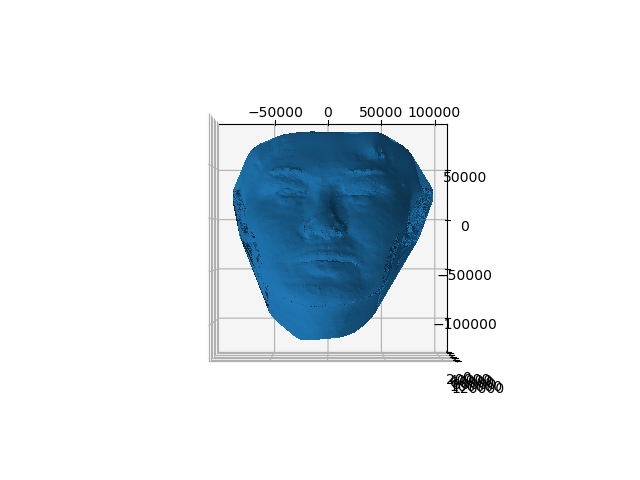

In [19]:
#Test face
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(90, -90)
#for i in range(4,53215):
surf = ax.plot_trisurf(Xnew, Ynew, Znew, linewidth=0, antialiased=False)
#ax.scatter3D(X, Y, Z, color = "green")
plt.show()

<IPython.core.display.Javascript object>


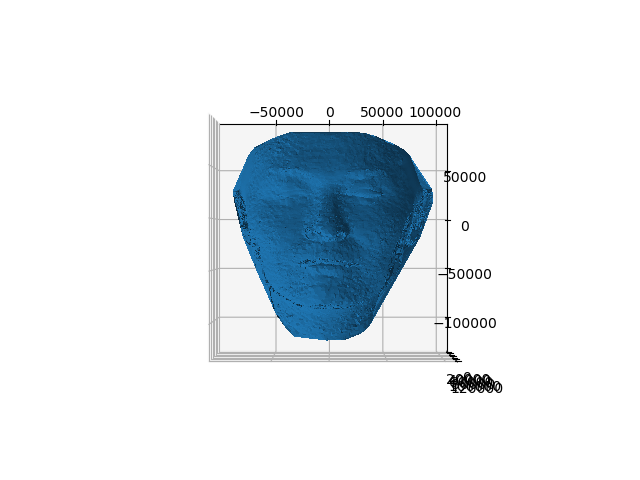

In [20]:
#Training above face and getting parameters using gradient descent
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(90, -90)
#for i in range(4,53215):
surf = ax.plot_trisurf(Xgen, Ygen, Zgen, linewidth=0, antialiased=False)
#ax.scatter3D(X, Y, Z, color = "green")
plt.show()

<IPython.core.display.Javascript object>


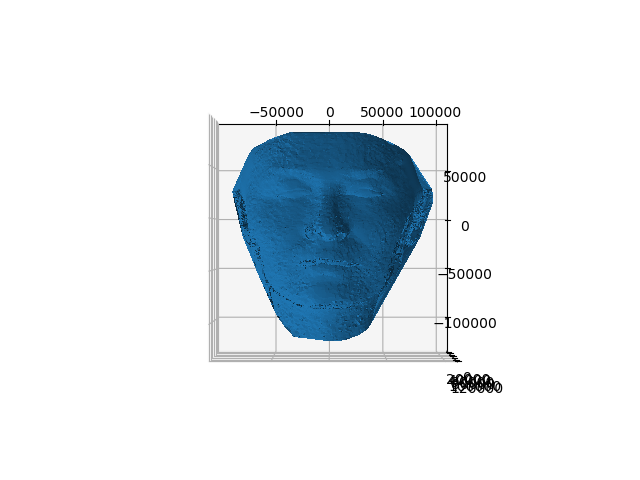

In [21]:
#Training above face and getting parameters using gradient descent and using x,y parameters on Z
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(90, -90)
#for i in range(4,53215):
surf = ax.plot_trisurf(Xgen, Ygen, Zgen2, linewidth=0, antialiased=False)
#ax.scatter3D(X, Y, Z, color = "green")
plt.show()

In [22]:
Xerr=Xgen-Xnew
Yerr=Ygen-Ynew
Zerr=Zgen-Znew
Xse=np.sum(Xerr*Xerr.T)
Yse=np.sum(Yerr*Yerr.T)
Zse=np.sum(Zerr*Zerr.T)

In [23]:
print("X error:",Xse)
print("Y error:",Yse)
print("Z error:",Zse)


X error: 88579279521.94453
Y error: 55007754522.69435
Z error: 50739509357.95967


In [24]:
Xerr=Xgen-Xnew
Yerr=Ygen-Ynew
Zerr=Zgen2-Znew
Xse=np.sum(Xerr*Xerr.T)
Yse=np.sum(Yerr*Yerr.T)
Zse=np.sum(Zerr*Zerr.T)

In [25]:
print("X error:",Xse)
print("Y error:",Yse)
print("Z error:",Zse)


X error: 88579279521.94453
Y error: 55007754522.69435
Z error: 131158038347.25084
